## Token Analysis 
Some analysis about the words found in the verdicts. 
This might help to decide which type of tokenization I need to use to create a scalable and robust summarization system.

Assumption: When executing this notebook, we are in the "analysis" folder, to have the ability to use relative paths.

### Data Loading

In [1]:
from collections import Counter
import io
import os
import pickle
from pathlib import Path
import seaborn as sns
from pprint import pprint

In [2]:
with io.open(Path("..")/".."/"model"/"frequency.pkl", "rb") as f:
    counter = pickle.load(f)

In [3]:
counts = counter.values()
print("Range of token counts:", "[", min(counts),",", max(counts), "]")

Range of token counts: [ 1 , 11483317 ]


In [4]:
print("Most common words:")
pprint(counter.most_common(20))

Most common words:
[('der', 11483317),
 ('die', 9463792),
 ('<num>', 8520516),
 ('des', 4399697),
 ('und', 3972521),
 ('in', 3283605),
 ('nicht', 3177785),
 ('zu', 2724230),
 ('den', 2705725),
 ('ist', 2276210),
 ('von', 2254338),
 ('das', 2231472),
 ('dem', 2151194),
 ('auf', 2111949),
 ('dass', 2008217),
 ('im', 1971140),
 ('für', 1961108),
 ('eine', 1843921),
 ('mit', 1750234),
 ('nach', 1680086)]


In [5]:
print("Number of uniqe words:", len(counter))

Number of uniqe words: 1051767


In [6]:
frequency_count = Counter(counts)
print("Most common number of occurences of unique words:")
pprint(frequency_count.most_common(20))

Most common number of occurences of unique words:
[(1, 436356),
 (2, 160253),
 (3, 76892),
 (4, 51989),
 (5, 34317),
 (6, 26883),
 (7, 20606),
 (8, 16873),
 (9, 13957),
 (10, 12253),
 (11, 10198),
 (12, 9115),
 (13, 7920),
 (14, 7281),
 (15, 6300),
 (16, 5849),
 (17, 5157),
 (18, 4867),
 (19, 4445),
 (20, 4201)]


Based on the very large portion of unique words, which only appear a handful of times, we need to set a token count threshold. Otherwise the number of tokens will be way to large for learning.

In [7]:
threshold = 100
filtered_counts = list(filter(lambda x: x > threshold, counts))
print("Number of unique words (after threshold filter):", len(filtered_counts))
print("Percentage of total words cut:", (1-sum(filtered_counts)/sum(counts)))

Number of unique words (after threshold filter): 52139
Percentage of total words cut: 0.029156844287864803


Percentage of individual word occurences:


<AxesSubplot:ylabel='Density'>

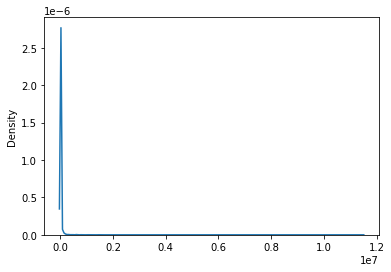

In [8]:
print("Percentage of individual word occurences:")
sns.kdeplot(filtered_counts)

In [9]:
# TODO do plot of threshold vs percentage of total words cut

### Result
The tokenization should probably be build around byte-pair encoding, otherwise is the number of unique words just way to high. A high threshold might be an Option, as only a small portion of the verdict would be replaced with "\<unk\>"

## Guiding Principle Analysis
I will have a look at general properties for the Guiding Principles. E.g. number of sentences, len

In [12]:
import sys
sys.path.append("..")
from tqdm import tqdm
from functools import reduce

from preprocessing import Tokenizer
DATA_PATH = Path("..")/".."/"data"/"dataset"


In [11]:
gps = []
tok = Tokenizer(Path("..")/".."/"model")
for file in tqdm(os.listdir(DATA_PATH), desc="Tokenizing:"):
    verdict = tok.tokenize_verdict(DATA_PATH/file)
    gps.append(verdict["guiding_principle"])

Tokenizing:: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94104/94104 [12:05<00:00, 129.71it/s]


In [13]:
gp_lengths = list(map(lambda sentences: list(map(lambda sentence: len(sentence),sentences)),gps))
all_lengths = reduce(lambda x, y: x+y, gp_lengths)
average = sum(all_lengths)/len(all_lengths)
print("Average guiding principle length:", average)

Average guiding principle length: 26.09067125873431


In [16]:
print("Lenghts in : [", min(all_lengths), ",", max(all_lengths), "]")
print("Total num tokens:", sum(all_lengths))

Lenghts in : [ 1 , 206 ]
Total num sentences: 7090740


<AxesSubplot:ylabel='Density'>

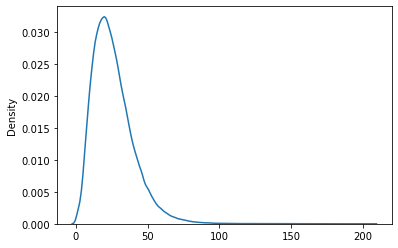

In [15]:
sns.kdeplot(all_lengths)

In [18]:
num_gps = list(map(lambda gps: len(gps), gp_lengths))
sent_average = sum(num_gps)/len(num_gps)
print("Average number of gp sentences:", sent_average)

Average number of gp sentences: 2.88800688599847


In [19]:
print("Lenghts in : [", min(num_gps), ",", max(num_gps), "]")
print("Total num tokens:", sum(num_gps))

Lenghts in : [ 0 , 79 ]
Total num tokens: 271773


ATTENTION: We have to filter the guiding principles after tokenization as well, otherwise there might be an empty verdict!

<AxesSubplot:ylabel='Density'>

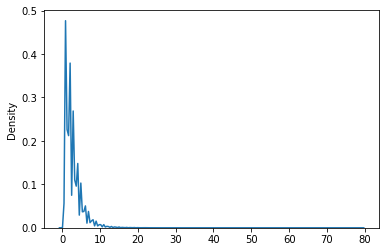

In [20]:
sns.kdeplot(num_gps)